<a href="https://colab.research.google.com/github/Hamzahmed/Analysis/blob/main/homework_Session_4%2C_Search_mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Search Methods for AI Applications**

1.   List item
2.   List item




## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

# Brute-Force Search

The global minimum point is located at [0. 0.]
The function value at this global point is 0.0


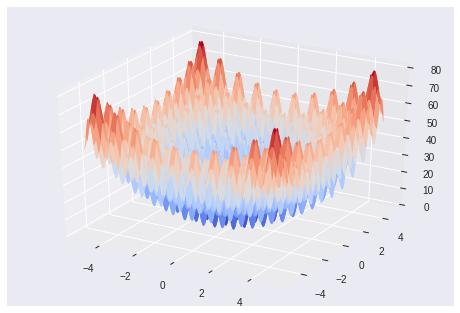

In [ ]:
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#Here we define function f. f is the function that we like to find its global minimum. Here f is the
#famous Rastrigin Function that has many local minima.
  
def f(z):
    x,y=z
    h = (x**2 - 10 * np.cos(2 * 3.14 * x)) +(y**2 - 10 * np.cos(2 * 3.14 * y)) + 20
    return (h)
  
 
# Let's take a look at how this function looks like. 

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.002)
Y = np.arange(-5, 5, 0.002)
X, Y = np.meshgrid(X, Y)
Z = f((X,Y))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True) 
  
  
  
# We use Python's Scipy module and its built-in optimizer method, brute. Actually
# implementing brute force search is not that hard; define a grid, evaluate the 
#function over the grid points, and choose the point that has the minimum value.
# Of course the grid points should be close enough to make sure that we don't 
# miss a global minimum point between them. The rule of thumb is that the resolution of
# grid should be higher than the curvature of function surface, otherwise we 
# are going to miss those fine curves that fall between our grid points.
  
rranges = (slice(-4, 4,0.01), slice(-4, 4,0.01))

resbrute = optimize.brute(f, rranges,full_output=True,
                          finish=optimize.fmin)
print("The global minimum point is located at",resbrute[0])  

print("The function value at this global point is",resbrute[1])  

# For full description of how to use SciPy's brute force optimization and the arguments it takes, please see its official
#documentation at: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.brute.html



# Homework
Try this technique on another function! Edit function f, and put a new function there and see whether it finds the global minimum point or not. Don't be afraid of going 3-D. But notice that if you define a 3-D function, you have to add another dimension to rranges as well.

In [ ]:
import numpy as np
x = np.random.random((2,2))
def f(x):
  y = np.sin(x)
  return y
a = np.amin(f(x))
#########################
list_ind=[]
for i in x:
  f_x = f(x)
  list_ind.append(f_x)
min_func=np.amin(x)
min_val=f(min_func)
print ("a =",min_val)
print (x)
print(f(x))
print ("a with amin function=",a)
print(min_func)


a = 0.044925421963326925
[[0.19290225 0.66846677]
 [0.27054674 0.04494055]]
[[0.19170812 0.61978348]
 [0.26725833 0.04492542]]
a with amin function= 0.044925421963326925
0.04494054781995749


#Homework: Random Search
Implement a pure random search method, and find global minimum point of Rastrigin Function.

The global minimum point is located at [0. 0.]
The function value at this global point is 0.0


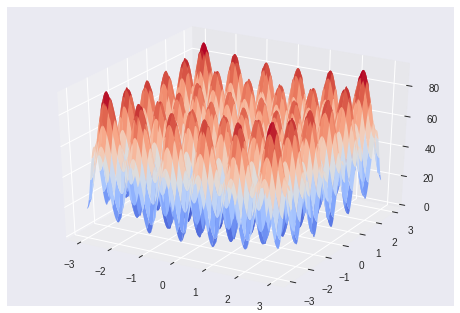

In [ ]:
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#Here we define function f. f is the function that we like to find its global minimum. Here f is the
#famous Rastrigin Function that has many local minima.
  
def f(z):
    x,y=z
    h = (x**2 - 20 * np.cos(2 * np.pi * x)) +(y**2 - 20 * np.cos(2 * np.pi * y)) + 40
    return (h)
  
 
# Let's take a look at how this function looks like. 

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-3, 3, 0.001)
Y = np.arange(-3, 3, 0.001)
X, Y = np.meshgrid(X, Y)
Z = f((X,Y))

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True) 
  
  
  
# We use Python's Scipy module and its built-in optimizer method, brute. Actually
# implementing brute force search is not that hard; define a grid, evaluate the 
#function over the grid points, and choose the point that has the minimum value.
# Of course the grid points should be close enough to make sure that we don't 
# miss a global minimum point between them. The rule of thumb is that the resolution of
# grid should be higher than the curvature of function surface, otherwise we 
# are going to miss those fine curves that fall between our grid points.
  
rranges = (slice(-4, 4,0.01), slice(-4, 4,0.01))

resbrute = optimize.brute(f, rranges,full_output=True,
                          finish=optimize.fmin)
print("The global minimum point is located at",resbrute[0])  

print("The function value at this global point is",resbrute[1])  

# For full description of how to use SciPy's brute force optimization and the arguments it takes, please see its official
#documentation at: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.brute.html



  
  

# Simulated Annealing

Best solution: [-0.00216525  0.0313594 ]
Best objective: 0.0180391603645758


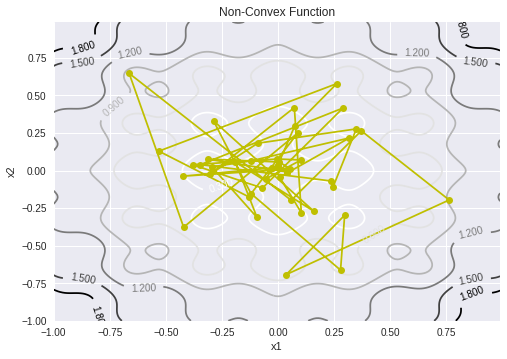

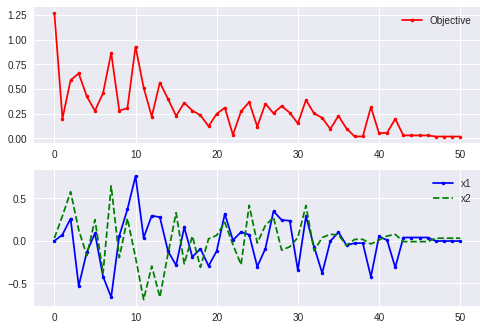

In [ ]:
#codes for SA is coming from Brigham Young University's ME 575's Optimization course, taught by Professor: John D. Hedengren. Codes are partially edited by me. - Behnam Kia
# Import some other libraries that we'll need
# matplotlib and numpy packages must also be installed
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# define objective function
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*np.pi*x1) - 0.1*math.cos(6.0*np.pi*x2)
    return obj

# Start location
x_start = [0.8, -0.5]

# Design variables at mesh points
i1 = np.arange(-1.0, 1.0, 0.01)
i2 = np.arange(-1.0, 1.0, 0.01)
x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)
for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = 0.2 + x1m[i][j]**2 + x2m[i][j]**2 \
             - 0.1*math.cos(6.0*3.1415*x1m[i][j]) \
             - 0.1*math.cos(6.0*3.1415*x2m[i][j])

    
 


# Create a contour plot
plt.figure()
# Specify contour lines
#lines = range(2,52,2)
# Plot contours
CS = plt.contour(x1m, x2m, fm)#,lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title('Non-Convex Function')
plt.xlabel('x1')
plt.ylabel('x2')

##################################################
# Simulated Annealing
##################################################
# Number of cycles
n = 50
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0/math.log(p1)
# Final temperature
t50 = -1.0/math.log(p50)
# Fractional reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))
# Initialize x
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0
# Current best results so far
xc = np.zeros(2)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0
for i in range(n):
    for j in range(m):
        # Generate new trial points
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        DeltaE = abs(f(xi)-fc)
        if (f(xi)>fc):
            # Initialize DeltaE_avg if a worse solution was found
            #   on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = f(xc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    # Lower the temperature for next cycle
    t = frac * t

# print solution
print('Best solution: ' + str(xc))
print('Best objective: ' + str(fc))

plt.plot(x[:,0],x[:,1],'y-o')
plt.savefig('contour.png')

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0],'b.-')
ax2.plot(x[:,1],'g--')
ax2.legend(['x1','x2'])

# Save the figure as a PNG
plt.savefig('iterations.png')

plt.show()



# `Homework
Try SA algorithm implemented above on Rastrigin Function. It is very possible that it may not find the global minimum point at the begining. Try changing the parameters of the algorithm to find the global minimum located at 0 and 0.

# Evolutionary Computation

#Deterministic and Stochastic Gradient Based Methods
There will be more than an entire session dedicated to training neural networks using stochastic gradient disent methods. Therefore in this session we skip studying these methods.

There are other search methods such as Hill Climbing, Tabu search, etc. Check them out yourself. Some of them are local, and some global. 